<a href="https://colab.research.google.com/github/Gabrielhfalcao/Analise-Exploratoria-Tempo/blob/main/analiseExploratoriaTempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [93]:
df = pd.read_csv('/content/drive/MyDrive/tempo.csv', delimiter=';')
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [94]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [95]:
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [96]:
mediana = sts.median(df['Umidade'])
mediana

85.5

In [99]:
df.loc[(df['Umidade'] > 100), 'Umidade'] = mediana
df.loc[(df['Umidade'] < 0), 'Umidade'] = mediana

df.groupby(['Umidade']).sum()

<ipython-input-99-c87287ae83e8>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Umidade']).sum()


,Temperatura
Umidade,
65.0,64
70.0,209
75.0,81
80.0,68
85.0,85
85.5,145
86.0,83
90.0,152
91.0,71


In [100]:
df['Umidade'].fillna(mediana, inplace=True)
df['Umidade'].isnull().sum()

0

<ipython-input-101-77bbcca01cb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(df['Umidade']).set_title('Umidade')


Text(0.5, 1.0, 'Umidade')

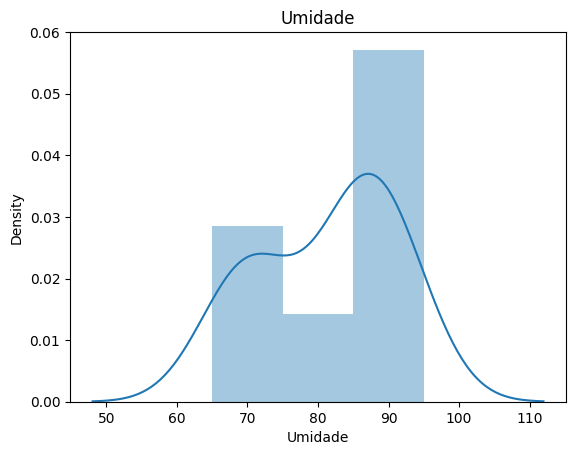

In [101]:
srn.distplot(df['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

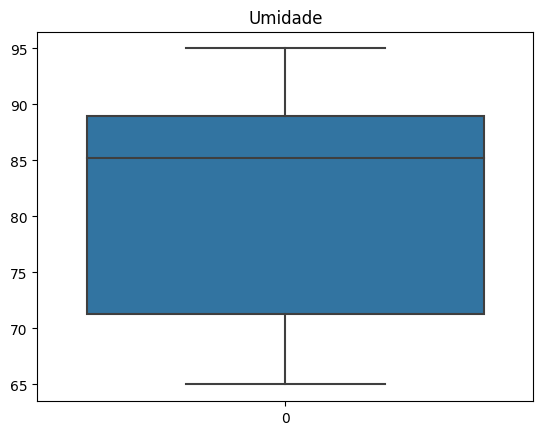

In [102]:
srn.boxplot(df['Umidade']).set_title('Umidade')

In [104]:
df.groupby(['Temperatura']).size()

Temperatura
64      1
65      1
68      1
69      1
70      1
71      1
72      1
75      2
80      1
81      1
83      1
85      1
1220    1
dtype: int64

In [105]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [106]:
mediana = sts.median(df['Temperatura'])
mediana

73.5

In [107]:
df.loc[df['Temperatura'] > 130, 'Temperatura'] = mediana
df.groupby(['Temperatura']).size()

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

<ipython-input-109-ec171a6e2906>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(df['Temperatura']).set_title('Temperatura')


Text(0.5, 1.0, 'Temperatura')

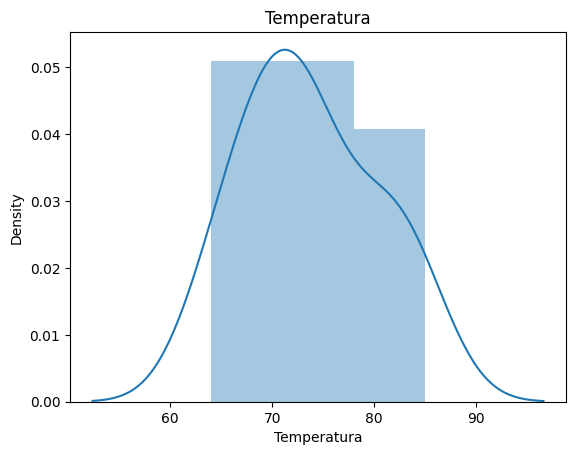

In [109]:
srn.distplot(df['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

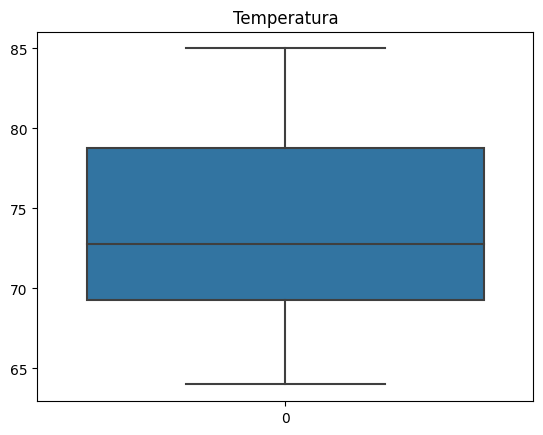

In [110]:
srn.boxplot(df['Temperatura']).set_title('Temperatura')

In [111]:
df['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [112]:
agrupado = df.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [113]:
df['Vento'].fillna('FALSO', inplace=True)
df['Vento'].isnull().sum()

0

Text(0.5, 1.0, 'Vento')

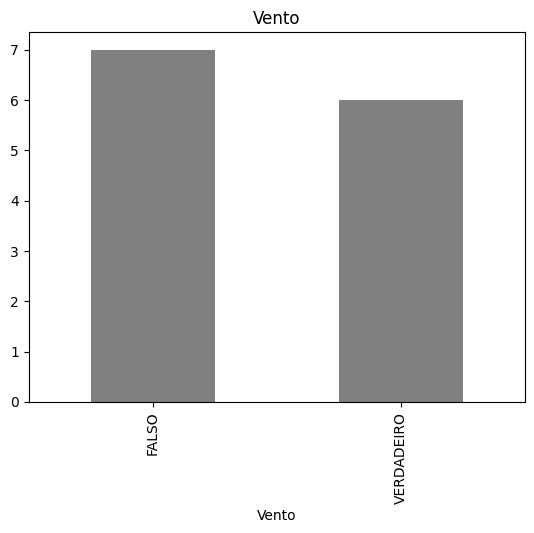

In [114]:
agrupado.plot.bar(color='gray').set_title('Vento')

In [115]:
df['Aparencia'].describe()

count      14
unique      4
top       sol
freq        5
Name: Aparencia, dtype: object

In [116]:
df.groupby(['Aparencia']).size()

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [118]:
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
agrupado = df.groupby(['Aparencia']).size()

Text(0.5, 1.0, 'Aparencia')

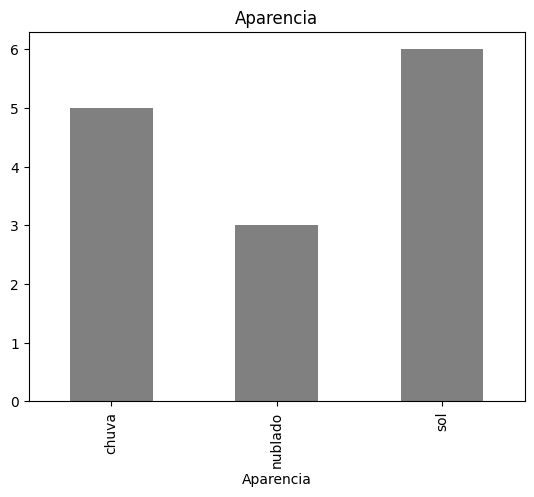

In [122]:
agrupado.plot.bar(color='gray').set_title('Aparencia')

In [123]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
